#### Question 1.a) 
Define two 2-dimensional Gaussians: \\(G_1\\) and \\( G_2 \\)

i. \\( G_1 \\) has mean \\( \mu_1 = \begin{bmatrix} 0.25 \\ 0.3 \end{bmatrix} \\) and covariance matrix \\( \Sigma_1 = \begin{bmatrix} 0.2 & 0.25 \\ 0.25 & 0.4 \end{bmatrix} \\)

ii. \\( G_2 \\) has mean \\( \mu_2 = \begin{bmatrix} 0.7 \\ 0.75 \end{bmatrix} \\) and covariance matrix \\( \Sigma_2 = \begin{bmatrix} 0.3 & 0.1 \\ 0.1 & 0.4 \end{bmatrix} \\)


In [61]:
import numpy as np

# Define means
mean1 = np.array([0.25, 0.3])
mean2 = np.array([0.7, 0.75])

# Define covariance matrices
cov1 = np.array([[0.2, 0.25], [0.25, 0.4]])
cov2 = np.array([[0.3, 0.1], [0.1, 0.4]])

iii. Generate 100 data points from both.

iv. Use first 80 data points from both as training set and the next 20
from both as your test set.

In [62]:
from scipy.stats import multivariate_normal

# Generate 100 data points for G1
data_G1 = multivariate_normal.rvs(mean=mean1, cov=cov1, size=100)
# Generate 100 data points for G2
data_G2 = multivariate_normal.rvs(mean=mean2, cov=cov2, size=100)

# Split data into training and test sets
train_G1, test_G1 = data_G1[:80], data_G1[80:]
train_G2, test_G2 = data_G2[:80], data_G2[80:]

v. Use a two-class FLD to reduce dimensionality of the system to 1.

vi. Set a threshold and classify data. Is this optimal?

In [63]:
# Calculate means of training data for each class
mean_train_G1 = np.mean(train_G1, axis=0)
mean_train_G2 = np.mean(train_G2, axis=0)

# Calculate within-class scatter matrices for each class
S1 = np.dot((train_G1 - mean_train_G1).T, (train_G1 - mean_train_G1))
S2 = np.dot((train_G2 - mean_train_G2).T, (train_G2 - mean_train_G2))

# Total within-class scatter matrix
Sw = S1 + S2

# Calculate the FLD projection direction
w = np.linalg.inv(Sw).dot(mean_train_G1 - mean_train_G2)

In [64]:
# Project training data
train_proj_G1 = train_G1.dot(w)
train_proj_G2 = train_G2.dot(w)

# Project test data
test_proj_G1 = test_G1.dot(w)
test_proj_G2 = test_G2.dot(w)

In [65]:
# Calculate the midpoint threshold
threshold = (np.mean(train_proj_G1) + np.mean(train_proj_G2)) / 2

vii. Vary threshold and find the optimal value.  
viii. What is the accuracy you are getting?  


In [68]:
def calculate_accuracy(threshold, proj_G1, proj_G2):
    # Classify based on threshold
    pred_G1 = proj_G1 > threshold  # Classify G1 points as 1 if above threshold
    pred_G2 = proj_G2 <= threshold # Classify G2 points as 0 if below or equal to threshold

    # Calculate accuracy
    correct_G1 = np.sum(pred_G1 == 1)
    correct_G2 = np.sum(pred_G2 == 0)
    total_correct = correct_G1 + correct_G2
    accuracy = total_correct / (len(proj_G1) + len(proj_G2))
    return accuracy

# Range of thresholds to test
thresholds = np.linspace(min(min(test_proj_G1), min(test_proj_G2)),
                         max(max(test_proj_G1), max(test_proj_G2)), 100)

# Find the optimal threshold
best_accuracy = 0
best_threshold = threshold
for thresh in thresholds:
    accuracy = calculate_accuracy(thresh, test_proj_G1, test_proj_G2)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = thresh

print(f"Optimal Threshold: {best_threshold}")
print(f"Accuracy with Optimal Threshold: {best_accuracy * 100:.2f}%")


Optimal Threshold: -0.026226343360273983
Accuracy with Optimal Threshold: 97.50%


### Question 1.b

Find classification accuracy using:

i. Euclidean classifier  
ii. Bayesian classifier  


In [69]:
def euclidean_classifier(test_data, mean_G1, mean_G2):
    # Calculate Euclidean distance to each class mean
    dist_G1 = np.linalg.norm(test_data - mean_G1, axis=1)
    dist_G2 = np.linalg.norm(test_data - mean_G2, axis=1)

    # Classify based on which mean is closer
    predictions = np.where(dist_G1 < dist_G2, 1, 0)  # 1 for G1, 0 for G2
    return predictions

# Apply Euclidean classifier on test sets
pred_G1 = euclidean_classifier(test_G1, mean_train_G1, mean_train_G2)
pred_G2 = euclidean_classifier(test_G2, mean_train_G1, mean_train_G2)

# Calculate accuracy
accuracy_euclidean = (np.sum(pred_G1 == 1) + np.sum(pred_G2 == 0)) / (len(test_G1) + len(test_G2))
print(f"Euclidean Classifier Accuracy: {accuracy_euclidean * 100:.2f}%")

Euclidean Classifier Accuracy: 57.50%


In [70]:
from scipy.stats import multivariate_normal

# Define likelihoods using Gaussian distributions
likelihood_G1 = multivariate_normal(mean=mean_train_G1, cov=cov1)
likelihood_G2 = multivariate_normal(mean=mean_train_G2, cov=cov2)

def bayesian_classifier(test_data):
    # Calculate likelihoods for each class
    p_G1 = likelihood_G1.pdf(test_data)
    p_G2 = likelihood_G2.pdf(test_data)

    # Classify based on which likelihood is higher
    predictions = np.where(p_G1 > p_G2, 1, 0)  # 1 for G1, 0 for G2
    return predictions

# Apply Bayesian classifier on test sets
pred_G1_bayes = bayesian_classifier(test_G1)
pred_G2_bayes = bayesian_classifier(test_G2)

# Calculate accuracy
accuracy_bayesian = (np.sum(pred_G1_bayes == 1) + np.sum(pred_G2_bayes == 0)) / (len(test_G1) + len(test_G2))
print(f"Bayesian Classifier Accuracy: {accuracy_bayesian * 100:.2f}%")


Bayesian Classifier Accuracy: 85.00%


### Question 1.c

Define three 4-dimensional Gaussians. Generate 100 data points for each class using an appropriate covariance matrix and means. Use FLD to reduce to dimensions:

i. 3  
ii. 2  
iii. 1  

In [20]:

# Define means for each Gaussian
mean_C1 = np.array([1, 2, 1, 2])
mean_C2 = np.array([3, 4, 3, 4])
mean_C3 = np.array([5, 6, 5, 6])

# Define covariance matrices for each Gaussian (arbitrary values chosen)
cov_C1 = np.array([[0.5, 0.1, 0.1, 0.2],
                   [0.1, 0.6, 0.1, 0.3],
                   [0.1, 0.1, 0.7, 0.2],
                   [0.2, 0.3, 0.2, 0.8]])

cov_C2 = np.array([[0.6, 0.2, 0.1, 0.3],
                   [0.2, 0.5, 0.2, 0.1],
                   [0.1, 0.2, 0.6, 0.2],
                   [0.3, 0.1, 0.2, 0.7]])

cov_C3 = np.array([[0.7, 0.3, 0.2, 0.1],
                   [0.3, 0.5, 0.2, 0.2],
                   [0.2, 0.2, 0.8, 0.3],
                   [0.1, 0.2, 0.3, 0.9]])

# Generate 100 data points for each class
data_C1 = multivariate_normal.rvs(mean=mean_C1, cov=cov_C1, size=100)
data_C2 = multivariate_normal.rvs(mean=mean_C2, cov=cov_C2, size=100)
data_C3 = multivariate_normal.rvs(mean=mean_C3, cov=cov_C3, size=100)

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Combine data and labels
data = np.vstack((data_C1, data_C2, data_C3))
labels = np.array([0] * 50 + [3]*50 + [1] * 100 + [2] * 100)

# Apply LDA to reduce to 3 dimensions
lda_3d = LinearDiscriminantAnalysis(n_components=3)
data_reduced_3d = lda_3d.fit_transform(data, labels)
data_reduced_3d

array([[-4.33939587e+00, -3.42358148e-01, -5.60449039e-01],
       [-2.86961137e+00,  5.96026049e-01, -1.28610461e-01],
       [-2.99332977e+00, -7.72701755e-01,  6.08905674e-01],
       [-4.65479665e+00,  1.43324145e+00, -1.43519199e+00],
       [-3.43435009e+00, -4.38213103e-02, -1.60143952e+00],
       [-2.89777701e+00,  6.46659433e-01,  3.83305461e-01],
       [-4.29396468e+00, -1.47509679e+00, -1.01104119e+00],
       [-3.83046555e+00, -2.15155435e+00, -8.98544941e-01],
       [-3.22336473e+00, -3.83770171e-01,  1.63069598e+00],
       [-5.24462487e+00,  1.18191555e+00, -2.36633551e-01],
       [-4.13077798e+00, -1.90938953e-01,  8.39012786e-01],
       [-5.08503226e+00, -1.34890463e+00, -3.52987353e-01],
       [-4.83190593e+00, -2.24529159e+00, -1.22097271e-01],
       [-4.92823823e+00,  8.29622325e-01,  1.18702014e+00],
       [-3.06669257e+00,  8.41372147e-01,  2.05160090e+00],
       [-3.16498220e+00,  2.07664669e+00,  8.19869962e-01],
       [-3.53421227e+00, -3.51569480e-01

In [27]:

# Apply LDA to reduce to 2 dimensions
lda_2d = LinearDiscriminantAnalysis(n_components=2)
data_reduced_2d = lda_2d.fit_transform(data, labels)
data_reduced_2d

array([[-4.33939587e+00, -3.42358148e-01],
       [-2.86961137e+00,  5.96026049e-01],
       [-2.99332977e+00, -7.72701755e-01],
       [-4.65479665e+00,  1.43324145e+00],
       [-3.43435009e+00, -4.38213103e-02],
       [-2.89777701e+00,  6.46659433e-01],
       [-4.29396468e+00, -1.47509679e+00],
       [-3.83046555e+00, -2.15155435e+00],
       [-3.22336473e+00, -3.83770171e-01],
       [-5.24462487e+00,  1.18191555e+00],
       [-4.13077798e+00, -1.90938953e-01],
       [-5.08503226e+00, -1.34890463e+00],
       [-4.83190593e+00, -2.24529159e+00],
       [-4.92823823e+00,  8.29622325e-01],
       [-3.06669257e+00,  8.41372147e-01],
       [-3.16498220e+00,  2.07664669e+00],
       [-3.53421227e+00, -3.51569480e-01],
       [-3.93405109e+00, -8.44606486e-01],
       [-4.33838603e+00,  5.71514313e-02],
       [-3.59656618e+00, -2.32222207e-01],
       [-3.47361596e+00, -1.62338315e+00],
       [-4.76805000e+00,  5.78630178e-01],
       [-2.97043314e+00,  1.47784811e-01],
       [-3.

In [28]:
# Apply LDA to reduce to 1 dimension
lda_1d = LinearDiscriminantAnalysis(n_components=1)
data_reduced_1d = lda_1d.fit_transform(data, labels)
data_reduced_1d

array([[-4.33939587],
       [-2.86961137],
       [-2.99332977],
       [-4.65479665],
       [-3.43435009],
       [-2.89777701],
       [-4.29396468],
       [-3.83046555],
       [-3.22336473],
       [-5.24462487],
       [-4.13077798],
       [-5.08503226],
       [-4.83190593],
       [-4.92823823],
       [-3.06669257],
       [-3.1649822 ],
       [-3.53421227],
       [-3.93405109],
       [-4.33838603],
       [-3.59656618],
       [-3.47361596],
       [-4.76805   ],
       [-2.97043314],
       [-3.03704882],
       [-3.48903546],
       [-5.98434824],
       [-0.84200848],
       [-3.19560927],
       [-2.94524764],
       [-3.5159328 ],
       [-3.46578528],
       [-1.91693519],
       [-3.79965281],
       [-2.884761  ],
       [-3.58573152],
       [-4.79200687],
       [-3.55969512],
       [-4.61396133],
       [-3.46089379],
       [-2.74552554],
       [-2.40155791],
       [-3.66715207],
       [-2.93625073],
       [-2.77056618],
       [-4.02407195],
       [-4

### Question 2

Define two 2-dimensional Gaussians:

i. Define \\( G_1 \\) and \\( G_2 \\):
   - \\( G_1 \\) has mean \\( \mu_1 = \begin{bmatrix} 0.25 \\ 1.2 \end{bmatrix} \\) and covariance matrix \\( \Sigma_1 = \begin{bmatrix} 0.2 & 0.25 \\ 0.25 & 0.4 \end{bmatrix} \\).
   - \\( G_2 \\) has mean \\( \mu_2 = \begin{bmatrix} -1.9 \\ 0.4 \end{bmatrix} \\) and covariance matrix \\( \Sigma_2 = \begin{bmatrix} 0.3 & 0.1 \\ 0.1 & 0.4 \end{bmatrix} \\).

ii. Generate 50 data points from \\( G_1 \\) and 150 data points from \\( G_2 \\).

iii. Use the first 40 data points of \\( G_1 \\) and 120 of \\( G_2 \\) as a training set and the rest of both as your test set.

iv. Train the system using the gradient descent algorithm, with learning rate \\( \eta = 0.3 \\).

v. Test the accuracy of training and testing datasets.

vi. Change the value of the initial guess for weight values. Is there any change in \\( E_{\text{min}} \\)?


In [30]:
# Part i

# Define means
mean1 = np.array([0.25, 1.2])
mean2 = np.array([-1.9, 0.4])

# Define covariance matrices
cov1 = np.array([[0.2, 0.25], [0.25, 0.4]])
cov2 = np.array([[0.3, 0.1], [0.1, 0.4]])

In [31]:
# Part ii
from scipy.stats import multivariate_normal

# Generate 50 data points for G1
data_G1 = multivariate_normal.rvs(mean=mean1, cov=cov1, size=50)

# Generate 150 data points for G2
data_G2 = multivariate_normal.rvs(mean=mean2, cov=cov2, size=150)


In [33]:
data_G1.shape, data_G2.shape

((50, 2), (150, 2))

In [34]:
# Part iii

# Split data for training and testing
train_G1 = data_G1[:40]
test_G1 = data_G1[40:]

train_G2 = data_G2[:120]
test_G2 = data_G2[120:]


In [35]:
# Part iv

# Combine training data and labels
X_train = np.vstack((train_G1, train_G2))
y_train = np.hstack((np.ones(len(train_G1)), np.zeros(len(train_G2))))

# Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand()
learning_rate = 0.3

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training the model
num_iterations = 1000  # Number of iterations for gradient descent

for i in range(num_iterations):
    # Compute the linear model output
    linear_output = np.dot(X_train, weights) + bias
    predictions = sigmoid(linear_output)

    # Compute the error
    errors = predictions - y_train

    # Compute gradients
    dw = np.dot(X_train.T, errors) / len(X_train)
    db = np.sum(errors) / len(X_train)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

print("Trained weights:", weights)
print("Trained bias:", bias)


Trained weights: [ 4.93394136 -0.736484  ]
Trained bias: 3.0925524455492934


In [36]:
# Part v

def calculate_accuracy(X, y, weights, bias):
    # Compute linear output and predictions
    linear_output = np.dot(X, weights) + bias
    predictions = sigmoid(linear_output) >= 0.5  # Classify as 1 if probability >= 0.5, else 0

    # Calculate accuracy
    accuracy = np.mean(predictions == y) * 100
    return accuracy

# Calculate training accuracy
train_accuracy = calculate_accuracy(X_train, y_train, weights, bias)
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Combine test data and labels
X_test = np.vstack((test_G1, test_G2))
y_test = np.hstack((np.ones(len(test_G1)), np.zeros(len(test_G2))))

# Calculate test accuracy
test_accuracy = calculate_accuracy(X_test, y_test, weights, bias)
print(f"Testing Accuracy: {test_accuracy:.2f}%")



Training Accuracy: 97.50%
Testing Accuracy: 100.00%


In [38]:
# Part vi

def calculate_error(X, y, weights, bias):
    # Compute linear output and predictions
    linear_output = np.dot(X, weights) + bias
    predictions = sigmoid(linear_output)

    # Calculate mean squared error
    error = np.mean((predictions - y) ** 2)
    return error

# New initial weights and bias
weights_new = np.random.rand(2)
bias_new = np.random.rand()

# Gradient Descent with new initial weights
for i in range(num_iterations):
    # Compute linear model output
    linear_output = np.dot(X_train, weights_new) + bias_new
    predictions = sigmoid(linear_output)

    # Compute the error
    errors = predictions - y_train

    # Compute gradients
    dw = np.dot(X_train.T, errors) / len(X_train)
    db = np.sum(errors) / len(X_train)

    # Update weights and bias
    weights_new -= learning_rate * dw
    bias_new -= learning_rate * db

# Calculate E_min for both initializations
E_min_original = calculate_error(X_train, y_train, weights, bias)
E_min_new = calculate_error(X_train, y_train, weights_new, bias_new)

print(f"E_min with original initial weights: {E_min_original:.4f}")
print(f"E_min with new initial weights: {E_min_new:.4f}")


E_min with original initial weights: 0.0151
E_min with new initial weights: 0.0149


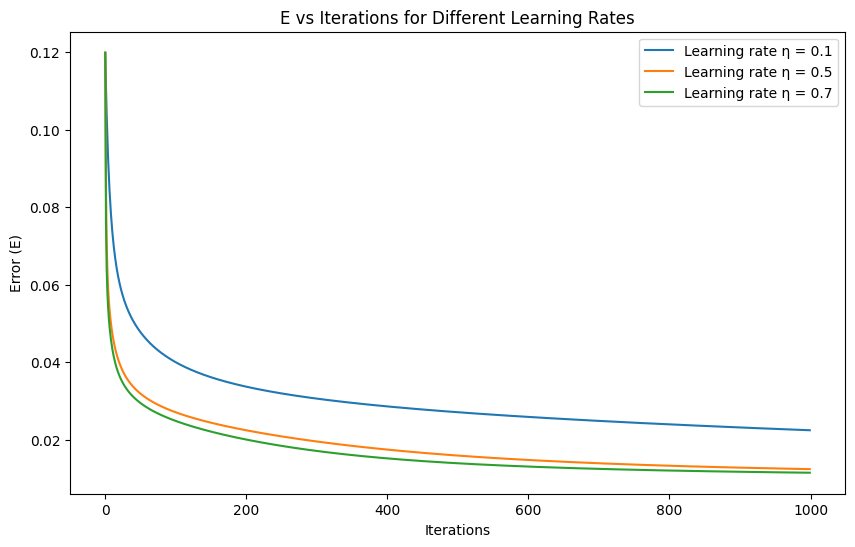

In [39]:
# Part vii

import matplotlib.pyplot as plt

# Define the function to perform gradient descent and record error at each iteration
def gradient_descent_with_error_tracking(X, y, initial_weights, initial_bias, learning_rate, num_iterations):
    weights = initial_weights.copy()
    bias = initial_bias
    errors = []

    for _ in range(num_iterations):
        # Compute linear output and predictions
        linear_output = np.dot(X, weights) + bias
        predictions = sigmoid(linear_output)

        # Compute the error (mean squared error)
        error = np.mean((predictions - y) ** 2)
        errors.append(error)

        # Compute gradients
        errors_diff = predictions - y
        dw = np.dot(X.T, errors_diff) / len(X)
        db = np.sum(errors_diff) / len(X)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return errors

# Parameters
num_iterations = 1000
initial_weights = np.random.rand(2)
initial_bias = np.random.rand()

# Run gradient descent with different learning rates and store the errors
learning_rates = [0.1, 0.5, 0.7]
errors_dict = {}

for eta in learning_rates:
    errors = gradient_descent_with_error_tracking(X_train, y_train, initial_weights, initial_bias, eta, num_iterations)
    errors_dict[eta] = errors

# Plotting E vs iteration curve for each learning rate
plt.figure(figsize=(10, 6))
for eta, errors in errors_dict.items():
    plt.plot(range(num_iterations), errors, label=f"Learning rate η = {eta}")

plt.xlabel("Iterations")
plt.ylabel("Error (E)")
plt.title("E vs Iterations for Different Learning Rates")
plt.legend()
plt.show()


### Question 3.a

Fit using MLP, with varying number of hidden units.

Define three 2-dimensional Gaussians: \\( G_1 \\), \\( G_2 \\), and \\( G_3 \\):

- \\( G_1 \\) has mean \\( \mu_1 = \begin{bmatrix} 0.25 \\ 0.3 \end{bmatrix} \\) and covariance matrix \\( \Sigma_1 = \begin{bmatrix} 0.2 & 0.25 \\ 0.25 & 0.4 \end{bmatrix} \\)
- \\( G_2 \\) has mean \\( \mu_2 = \begin{bmatrix} 0.5 \\ 0.6 \end{bmatrix} \\) and covariance matrix \\( \Sigma_2 = \begin{bmatrix} 0.3 & 0.1 \\ 0.1 & 0.4 \end{bmatrix} \\)
- \\( G_3 \\) has mean \\( \mu_3 = \begin{bmatrix} 0.7 \\ 0.75 \end{bmatrix} \\) and covariance matrix \\( \Sigma_3 = \begin{bmatrix} 0.3 & 0.1 \\ 0.1 & 0.4 \end{bmatrix} \\)

Generate 100 data points from each Gaussian.

- Use the first 80 data points from each as a training set and the next 20 from each as your test set.
  
This results in 2-dimensional inputs, with 3 classes. Train an MLP network with 3 hidden units.

- What is the training accuracy? What is the testing accuracy?


In [40]:
import numpy as np
from scipy.stats import multivariate_normal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Define means and covariance matrices for each Gaussian
mean_G1 = np.array([0.25, 0.3])
mean_G2 = np.array([0.5, 0.6])
mean_G3 = np.array([0.7, 0.75])

cov_G1 = np.array([[0.2, 0.25], [0.25, 0.4]])
cov_G2 = np.array([[0.3, 0.1], [0.1, 0.4]])
cov_G3 = np.array([[0.3, 0.1], [0.1, 0.4]])

# Generate 100 data points for each Gaussian
data_G1 = multivariate_normal.rvs(mean=mean_G1, cov=cov_G1, size=100)
data_G2 = multivariate_normal.rvs(mean=mean_G2, cov=cov_G2, size=100)
data_G3 = multivariate_normal.rvs(mean=mean_G3, cov=cov_G3, size=100)

# Assign labels: 0 for G1, 1 for G2, 2 for G3
labels_G1 = np.zeros(100)
labels_G2 = np.ones(100)
labels_G3 = np.full(100, 2)

In [41]:
# Split into training and test sets
train_data = np.vstack((data_G1[:80], data_G2[:80], data_G3[:80]))
train_labels = np.hstack((labels_G1[:80], labels_G2[:80], labels_G3[:80]))

test_data = np.vstack((data_G1[80:], data_G2[80:], data_G3[80:]))
test_labels = np.hstack((labels_G1[80:], labels_G2[80:], labels_G3[80:]))

# Convert labels to categorical (one-hot encoding) for MLP
train_labels = to_categorical(train_labels, 3)
test_labels = to_categorical(test_labels, 3)


In [42]:
# Define the MLP model
model = Sequential([
    Dense(3, input_shape=(2,), activation='relu'),  # 3 hidden units
    Dense(3, activation='softmax')                  # 3 output units for 3 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=100, batch_size=10, verbose=0)


/Users/thory/miniconda3/envs/tiny-ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Evaluate training accuracy
train_loss, train_accuracy = model.evaluate(train_data, train_labels, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate testing accuracy
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 47.92%
Testing Accuracy: 56.67%


### Question 3.b

How does variation in the number of hidden units affect accuracy?

i. Vary the number of hidden units to 2 and 4.  
ii. How does the accuracy value change? Is it more, less?  
iii. Vary it to 10, how does the testing accuracy change?  


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a function to create and train the model with a specified number of hidden units
def train_and_evaluate(hidden_units, X_train, y_train, X_test, y_test):
    # Define the MLP model
    model = Sequential([
        Dense(hidden_units, input_shape=(2,), activation='relu'),  # Varying hidden units
        Dense(3, activation='softmax')                             # Output layer for 3 classes
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

    # Evaluate training accuracy
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    # Evaluate testing accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    return train_accuracy, test_accuracy

# Train and evaluate with different hidden units
hidden_units_list = [2, 4, 10]
results = {}

for units in hidden_units_list:
    train_acc, test_acc = train_and_evaluate(units, train_data, train_labels, test_data, test_labels)
    results[units] = {
        'train_accuracy': train_acc * 100,
        'test_accuracy': test_acc * 100
    }
    print(f"Hidden Units: {units}")
    print(f"Training Accuracy: {results[units]['train_accuracy']:.2f}%")
    print(f"Testing Accuracy: {results[units]['test_accuracy']:.2f}%\n")


Hidden Units: 2
Training Accuracy: 39.58%
Testing Accuracy: 48.33%

Hidden Units: 4
Training Accuracy: 43.33%
Testing Accuracy: 40.00%

Hidden Units: 10
Training Accuracy: 48.33%
Testing Accuracy: 56.67%



### Question 3.c

**MLP for classification with FLD.**

1. Application of MLP for classification.
   i. Define three 4-dimensional Gaussians.  
   ii. Generate 100 data points for each class using an appropriate covariance matrix and means.  
   iii. Use FLD to reduce to 3 dimensions.  
   iv. Classify using a 2-layer MLP with 3 hidden units.  
   v. What are the training and testing accuracies?  
   vi. How do the accuracy values compare with the Euclidean classification you did before?  


In [55]:
import numpy as np
from scipy.stats import multivariate_normal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Define means and covariance matrices for each Gaussian
mean_G1 = np.array([1, 2, 1, 2])
mean_G2 = np.array([3, 4, 3, 4])
mean_G3 = np.array([5, 6, 5, 6])
mean_G4 = np.array([7, 8, 7, 8])

cov_G1 = np.array([[0.5, 0.1, 0.1, 0.2],
                   [0.1, 0.6, 0.1, 0.3],
                   [0.1, 0.1, 0.7, 0.2],
                   [0.2, 0.3, 0.2, 0.8]])

cov_G2 = np.array([[0.6, 0.2, 0.1, 0.3],
                   [0.2, 0.5, 0.2, 0.1],
                   [0.1, 0.2, 0.6, 0.2],
                   [0.3, 0.1, 0.2, 0.7]])

cov_G3 = np.array([[0.7, 0.3, 0.2, 0.1],
                   [0.3, 0.5, 0.2, 0.2],
                   [0.2, 0.2, 0.8, 0.3],
                   [0.1, 0.2, 0.3, 0.9]])

cov_G4 = np.array([[0.8, 0.2, 0.3, 0.1],
                   [0.2, 0.6, 0.2, 0.2],
                   [0.3, 0.2, 0.7, 0.4],
                   [0.1, 0.2, 0.4, 0.8]])

# Generate 100 data points for each class
data_G1 = multivariate_normal.rvs(mean=mean_G1, cov=cov_G1, size=100)
data_G2 = multivariate_normal.rvs(mean=mean_G2, cov=cov_G2, size=100)
data_G3 = multivariate_normal.rvs(mean=mean_G3, cov=cov_G3, size=100)
data_G4 = multivariate_normal.rvs(mean=mean_G4, cov=cov_G4, size=100)

# Assign labels: 0 for G1, 1 for G2, 2 for G3, 3 for G4
labels_G1 = np.zeros(100)
labels_G2 = np.ones(100)
labels_G3 = np.full(100, 2)
labels_G4 = np.full(100, 3)


In [56]:
# Combine data and labels
data = np.vstack((data_G1, data_G2, data_G3, data_G4))
labels = np.hstack((labels_G1, labels_G2, labels_G3, labels_G4))

# Shuffle and split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)


In [57]:
# Apply FLD to reduce dimensions to 3
fld = LinearDiscriminantAnalysis(n_components=3)
X_train_reduced = fld.fit_transform(X_train, y_train)
X_test_reduced = fld.transform(X_test)


In [58]:
# Convert labels to categorical (one-hot encoding) for MLP
y_train_categorical = to_categorical(y_train, 4)
y_test_categorical = to_categorical(y_test, 4)

# Define the MLP model
model = Sequential([
    Dense(3, input_shape=(3,), activation='relu'),  # 3 hidden units
    Dense(4, activation='softmax')                  # Output layer for 4 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reduced, y_train_categorical, epochs=100, batch_size=10, verbose=0)


/Users/thory/miniconda3/envs/tiny-ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Evaluate training accuracy
train_loss, train_accuracy = model.evaluate(X_train_reduced, y_train_categorical, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate testing accuracy
test_loss, test_accuracy = model.evaluate(X_test_reduced, y_test_categorical, verbose=0)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 92.81%
Testing Accuracy: 96.25%


The Euclidean classifier had an accuracy of 57.5%, while this one has 96.25%.